In [8]:
pip install xlrd
pip install torchviz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = "C:\\Users\\ASUS\\Downloads\\gait-in-parkinsons-disease-1.0.0\\gait-in-parkinsons-disease-1.0.0\\demographics.xls"
data = pd.read_excel(file_path, engine='xlrd')
data.head(10)

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,3,female,82,1.45,50.0,3.0,20.0,10.0,36.34,NaN,0.778
1,GaPt04,Ga,PD,4,male,68,1.71,NaN,2.5,25.0,8.0,11.00,0.642,0.818
2,GaPt05,Ga,PD,5,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,GaPt06,Ga,PD,6,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,GaPt07,Ga,PD,7,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579
5,GaPt08,Ga,PD,8,female,68,1.63,57.0,2.0,15.0,8.0,10.11,1.046,0.228
6,GaPt09,Ga,PD,9,male,69,1.60,68.0,3.0,34.0,17.0,12.70,0.894,1.253
7,GaPt12,Ga,PD,12,female,59,1.63,67.0,2.0,25.0,7.0,8.37,1.261,1.133
8,GaPt13,Ga,PD,13,male,70,1.68,53.0,2.0,38.0,21.0,15.51,0.726,0.798
9,GaPt14,Ga,PD,14,male,56,1.95,105.0,2.0,29.0,19.0,NaN,1.369,0.973


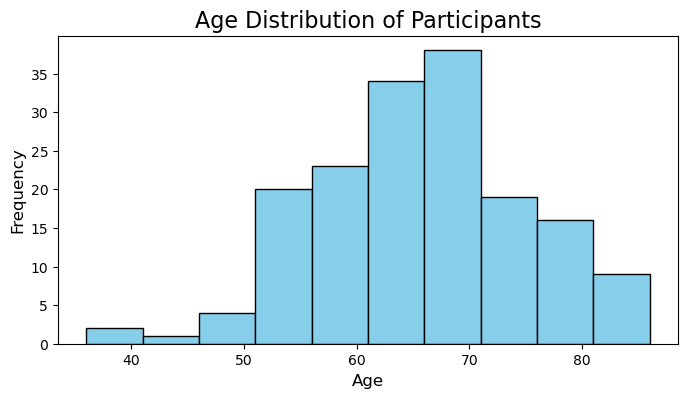

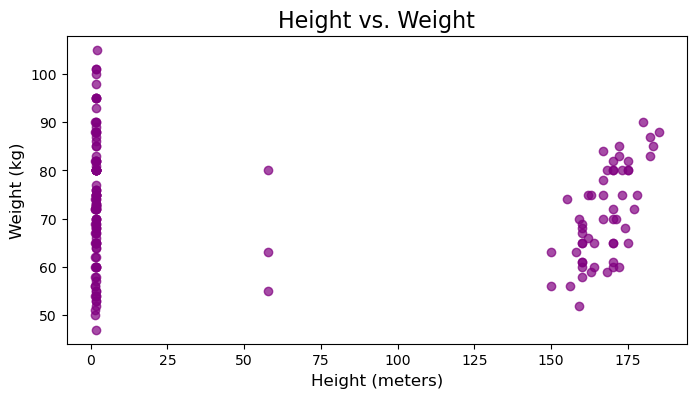

<Figure size 800x400 with 0 Axes>

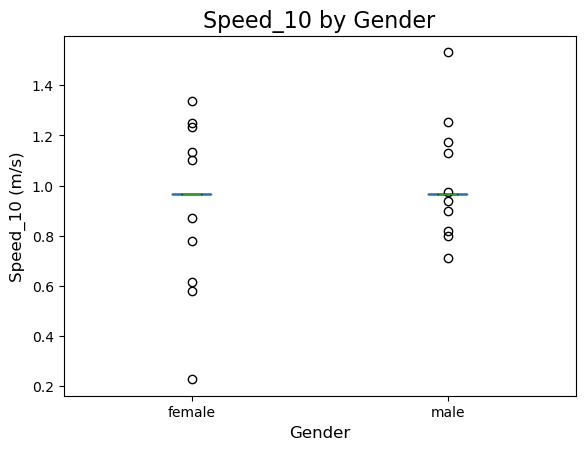

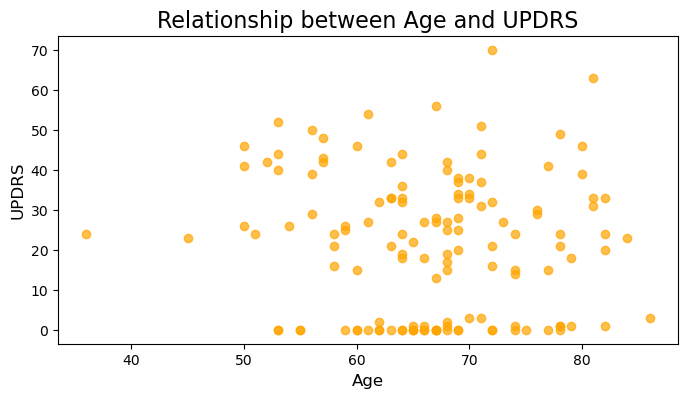

In [2]:
data['Height (meters)'].fillna(data['Height (meters)'].mean(), inplace=True)
data['Weight (kg)'].fillna(data['Weight (kg)'].mean(), inplace=True)
data['Speed_10'].fillna(data['Speed_10'].mean(), inplace=True)

plt.figure(figsize=(8, 4))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Participants', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(data['Height (meters)'], data['Weight (kg)'], alpha=0.7, color='purple')
plt.title('Height vs. Weight', fontsize=16)
plt.xlabel('Height (meters)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.show()

plt.figure(figsize=(8, 4))
data.boxplot(column='Speed_10', by='Gender', grid=False, notch=True)
plt.title('Speed_10 by Gender', fontsize=16)
plt.suptitle('')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Speed_10 (m/s)', fontsize=12)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(data['Age'], data['UPDRS'], alpha=0.7, color='orange')
plt.title('Relationship between Age and UPDRS', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('UPDRS', fontsize=12)
plt.show()

In [ ]:
data["Height (meters)"] = data["Height (meters)"].apply(lambda x: x / 100 if x > 10 else x)
data.head(10)

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,3,female,82,1.45,50.0,3.0,20.0,10.0,36.34,NaN,0.778
1,GaPt04,Ga,PD,4,male,68,1.71,NaN,2.5,25.0,8.0,11.00,0.642,0.818
2,GaPt05,Ga,PD,5,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,GaPt06,Ga,PD,6,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,GaPt07,Ga,PD,7,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579
5,GaPt08,Ga,PD,8,female,68,1.63,57.0,2.0,15.0,8.0,10.11,1.046,0.228
6,GaPt09,Ga,PD,9,male,69,1.60,68.0,3.0,34.0,17.0,12.70,0.894,1.253
7,GaPt12,Ga,PD,12,female,59,1.63,67.0,2.0,25.0,7.0,8.37,1.261,1.133
8,GaPt13,Ga,PD,13,male,70,1.68,53.0,2.0,38.0,21.0,15.51,0.726,0.798
9,GaPt14,Ga,PD,14,male,56,1.95,105.0,2.0,29.0,19.0,NaN,1.369,0.973


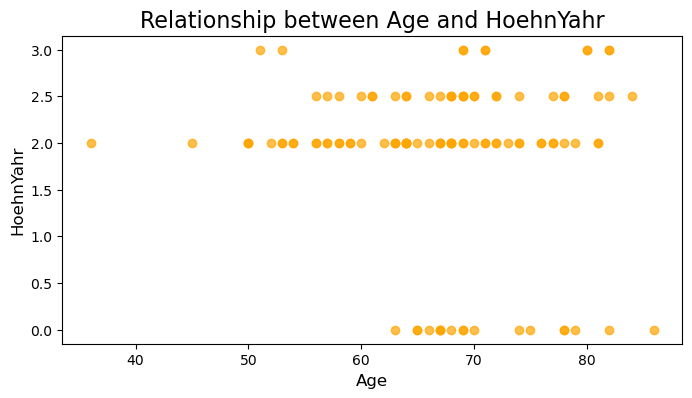

In [3]:
plt.figure(figsize=(8, 4))
plt.scatter(data['Age'], data['HoehnYahr'], alpha=0.7, color='orange')
plt.title('Relationship between Age and HoehnYahr', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('HoehnYahr', fontsize=12)
plt.show()

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
data.head(10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

       ID Study Group  Subjnum  Gender  Age  Height (meters)  Weight (kg)  \
0  GaPt03    Ga    PD        3  female   82             1.45    50.000000   
1  GaPt04    Ga    PD        4    male   68             1.71    72.558282   
2  GaPt05    Ga    PD        5  female   82             1.53    51.000000   
3  GaPt06    Ga    PD        6    male   72             1.70    82.000000   
4  GaPt07    Ga    PD        7  female   53             1.67    54.000000   
5  GaPt08    Ga    PD        8  female   68             1.63    57.000000   
6  GaPt09    Ga    PD        9    male   69             1.60    68.000000   
7  GaPt12    Ga    PD       12  female   59             1.63    67.000000   
8  GaPt13    Ga    PD       13    male   70             1.68    53.000000   
9  GaPt14    Ga    PD       14    male   56             1.95   105.000000   

   HoehnYahr  UPDRS  UPDRSM       TUAG  Speed_01 (m/sec)  Speed_10  
0        3.0   20.0    10.0  36.340000          1.125345     0.778  
1        2.5  

Training Fold 1/5
Early stopping triggered at epoch 27
Training Fold 2/5
Early stopping triggered at epoch 44
Training Fold 3/5
Early stopping triggered at epoch 45
Training Fold 4/5
Early stopping triggered at epoch 95
Training Fold 5/5
Early stopping triggered at epoch 73
Test MAE: 8.5725
Test R²: 0.4368
Test Explained Variance: 0.4376


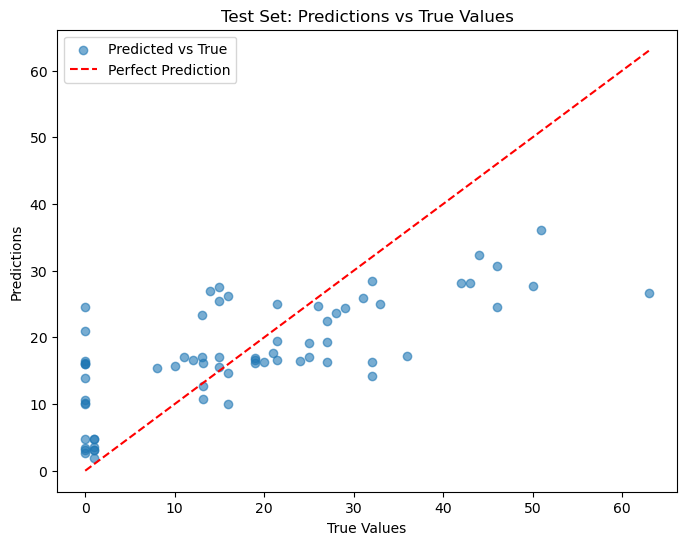

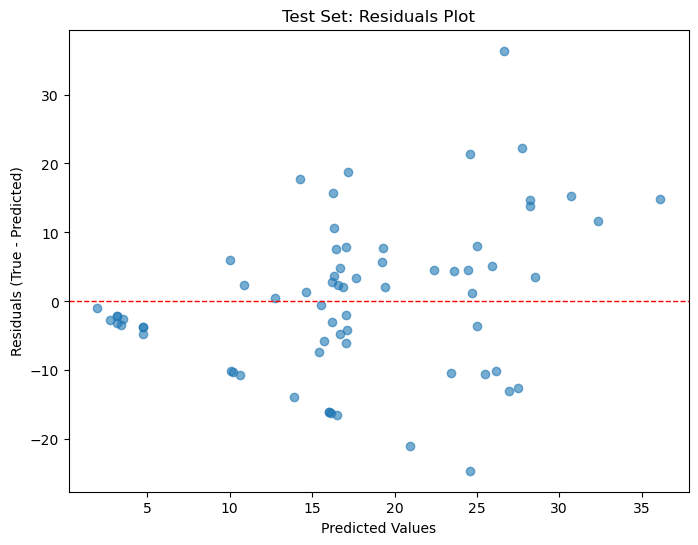

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Define the Residual Neural Network
class ResidualNN(nn.Module):
    def __init__(self, input_dim, output_dim, dropout_rate=0.3):
        super(ResidualNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.bn1 = nn.BatchNorm1d(256)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(64)
        self.projection = nn.Linear(256, 128)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        residual = x
        x = self.fc2(x)
        x = self.bn2(x)
        if residual.shape[1] != x.shape[1]:
            residual = self.projection(residual)
        x = torch.relu(x + residual)
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        return self.out(x)

# Ensemble class for weighted averaging
class Ensemble:
    def __init__(self):
        self.models = []
        self.weights = []

    def add_model(self, model, weight):
        self.models.append(model)
        self.weights.append(weight)

    def predict(self, X):
        predictions = [weight * model(X) for model, weight in zip(self.models, self.weights)]
        return torch.stack(predictions).sum(dim=0) / sum(self.weights)

# Function for evaluation and visualization
def evaluate_predictions(y_true, y_pred, y_scaler, title):
    y_true_original = y_scaler.inverse_transform(y_true)
    y_pred_original = y_scaler.inverse_transform(y_pred)
    residuals = y_true_original - y_pred_original

    # Scatter plot of predictions vs true values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true_original, y_pred_original, alpha=0.6, label='Predicted vs True')
    plt.plot([y_true_original.min(), y_true_original.max()],
             [y_true_original.min(), y_true_original.max()], 'r--', label='Perfect Prediction')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{title}: Predictions vs True Values')
    plt.legend()
    plt.show()

    # Residual plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_original, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (True - Predicted)')
    plt.title(f'{title}: Residuals Plot')
    plt.show()

# Feature engineering and scaling
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X = poly.fit_transform(data[['HoehnYahr', 'Speed_10', 'TUAG']])
y = data[['UPDRS','UPDRSM']].values

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Convert to PyTorch tensors
X_train_tensor, y_train_tensor = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_val_tensor, y_val_tensor = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32)
X_test_tensor, y_test_tensor = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# DataLoader for batching
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Cross-validation and training
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
ensemble = Ensemble()

for fold, (train_idx, val_idx) in enumerate(kf.split(X_temp)):
    print(f"Training Fold {fold + 1}/{k_folds}")
    X_train_fold, X_val_fold = X_temp[train_idx], X_temp[val_idx]
    y_train_fold, y_val_fold = y_temp[train_idx], y_temp[val_idx]

    # Convert to tensors
    X_train_tensor_fold, y_train_tensor_fold = torch.tensor(X_train_fold, dtype=torch.float32), torch.tensor(y_train_fold, dtype=torch.float32)
    X_val_tensor_fold, y_val_tensor_fold = torch.tensor(X_val_fold, dtype=torch.float32), torch.tensor(y_val_fold, dtype=torch.float32)

    # Initialize model
    input_dim = X_train_fold.shape[1]
    output_dim = y_train_fold.shape[1]
    model = ResidualNN(input_dim, output_dim).train()
    optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
    criterion = nn.HuberLoss()

    # Early stopping
    patience = 10
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    num_epochs = 100

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in DataLoader(TensorDataset(X_train_tensor_fold, y_train_tensor_fold), batch_size=batch_size, shuffle=True):
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor_fold)
            val_loss = criterion(val_outputs, y_val_tensor_fold).item()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
            torch.save(model.state_dict(), f"best_model_fold_{fold + 1}.pth")
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

    # Add best model to ensemble
    model.load_state_dict(torch.load(f"best_model_fold_{fold + 1}.pth"))
    ensemble.add_model(model.eval(), 1 / best_val_loss)

# Ensemble evaluation
ensemble_predictions = ensemble.predict(X_test_tensor).detach().numpy()
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(ensemble_predictions)

# Metrics
test_mae = mean_absolute_error(y_test_original, y_pred_original)
test_r2 = r2_score(y_test_original, y_pred_original)
test_explained_variance = explained_variance_score(y_test_original, y_pred_original)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Test Explained Variance: {test_explained_variance:.4f}")

# Visualization
evaluate_predictions(y_test, ensemble_predictions, scaler_y, "Test Set")


In [ ]:
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

Epoch [1/100], Train R²: 0.0189, Val R²: 0.1523
Epoch [2/100], Train R²: 0.1884, Val R²: 0.2475
Epoch [3/100], Train R²: 0.3240, Val R²: 0.2482
Epoch [4/100], Train R²: 0.3635, Val R²: 0.2176
Epoch [5/100], Train R²: 0.3646, Val R²: 0.2389
Epoch [6/100], Train R²: 0.3802, Val R²: 0.1996
Epoch [7/100], Train R²: 0.4003, Val R²: 0.1708
Epoch [8/100], Train R²: 0.4089, Val R²: 0.2056
Epoch [9/100], Train R²: 0.3771, Val R²: 0.2596
Epoch [10/100], Train R²: 0.4178, Val R²: 0.3091
Epoch [11/100], Train R²: 0.3896, Val R²: 0.3219
Epoch [12/100], Train R²: 0.3692, Val R²: 0.3438
Epoch [13/100], Train R²: 0.4120, Val R²: 0.3448
Epoch [14/100], Train R²: 0.3909, Val R²: 0.3455
Epoch [15/100], Train R²: 0.3749, Val R²: 0.3457
Early stopping triggered at epoch 16
Test R²: 0.5224


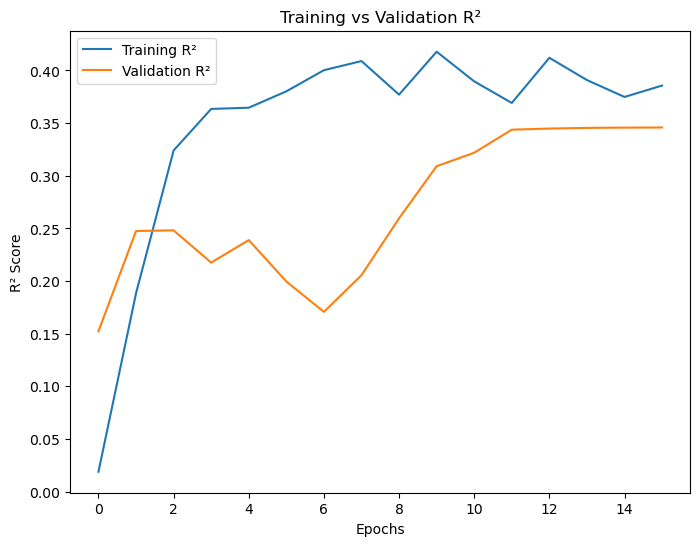

In [ ]:
X = data[['HoehnYahr', 'Speed_10', 'TUAG']]  # Use a subset of features
y = data[['UPDRS']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model with additional improvements
class CNN1D(nn.Module):
    def __init__(self, input_channels, output_dim, input_dim):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 64, kernel_size=3, stride=1, padding=1)  # Adjusted kernel size and padding
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1)

        # Compute the flattened size dynamically
        self._to_linear = None
        self._calculate_flattened_size(input_dim)

        self.fc1 = nn.Linear(self._to_linear, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.5)  # Increased dropout rate to prevent overfitting

    def _calculate_flattened_size(self, input_dim):
        with torch.no_grad():
            x = torch.zeros(1, 1, input_dim)  # Example input tensor
            x = torch.relu(self.conv1(x))
            x = torch.relu(self.conv2(x))
            self._to_linear = x.view(1, -1).size(1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize the CNN model
input_channels = 1  # 1 channel for tabular data
output_dim = y_train.shape[1]
input_dim = X_train.shape[1]  # Number of features

model = CNN1D(input_channels, output_dim, input_dim)

# Define loss function, optimizer, and scheduler
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5)

# Training loop with validation
num_epochs = 100
patience = 10
best_val_loss = float('inf')
epochs_without_improvement = 0
train_r2_scores, val_r2_scores = [], []

for epoch in range(num_epochs):
    # Training
    model.train()
    y_train_pred = []
    y_train_true = []
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        y_train_pred.extend(outputs.detach().numpy())
        y_train_true.extend(y_batch.numpy())

    train_r2 = r2_score(y_train_true, y_train_pred)
    train_r2_scores.append(train_r2)

    # Validation
    model.eval()
    y_val_pred = []
    y_val_true = []
    val_loss_epoch = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            val_loss_epoch += criterion(outputs, y_batch).item()
            y_val_pred.extend(outputs.numpy())
            y_val_true.extend(y_batch.numpy())

    val_r2 = r2_score(y_val_true, y_val_pred)
    val_r2_scores.append(val_r2)
    val_loss_epoch /= len(val_loader)
    scheduler.step(val_loss_epoch)

    # Early stopping
    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        epochs_without_improvement = 0
        torch.save(model.state_dict(), "best_cnn_model.pth")
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print(f"Early stopping triggered at epoch {epoch + 1}")
        break

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

# Load the best model
model.load_state_dict(torch.load("best_cnn_model.pth"))

# Evaluate on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_r2 = r2_score(y_test, test_outputs.numpy())

    print(f"Test R²: {test_r2:.4f}")

# Plot training vs validation R²
plt.figure(figsize=(8, 6))
plt.plot(train_r2_scores, label='Training R²')
plt.plot(val_r2_scores, label='Validation R²')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Training vs Validation R²')
plt.legend()
plt.show()

Training Fold 1/5
Epoch 1/100 | Train Loss: 1.3001 | Validation Loss: 0.9484


C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\ASUS\anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 2/100 | Train Loss: 0.7851 | Validation Loss: 1.1744
Epoch 3/100 | Train Loss: 0.7315 | Validation Loss: 0.6593
Epoch 4/100 | Train Loss: 0.6556 | Validation Loss: 0.7189
Epoch 5/100 | Train Loss: 0.6972 | Validation Loss: 0.6317
Epoch 6/100 | Train Loss: 0.6495 | Validation Loss: 0.7032
Epoch 7/100 | Train Loss: 0.5318 | Validation Loss: 0.8721
Epoch 8/100 | Train Loss: 0.6224 | Validation Loss: 0.7575
Epoch 9/100 | Train Loss: 0.5993 | Validation Loss: 0.6314
Epoch 10/100 | Train Loss: 0.4559 | Validation Loss: 0.5939
Epoch 11/100 | Train Loss: 0.5274 | Validation Loss: 0.5564
Epoch 12/100 | Train Loss: 0.5072 | Validation Loss: 0.5451
Epoch 13/100 | Train Loss: 0.4871 | Validation Loss: 0.5621
Epoch 14/100 | Train Loss: 0.5251 | Validation Loss: 0.5497
Epoch 15/100 | Train Loss: 0.4985 | Validation Loss: 0.5310
Epoch 16/100 | Train Loss: 0.4797 | Validation Loss: 0.5437
Epoch 17/100 | Train Loss: 0.4425 | Validation Loss: 0.5360
Epoch 18/100 | Train Loss: 0.4382 | Validation L

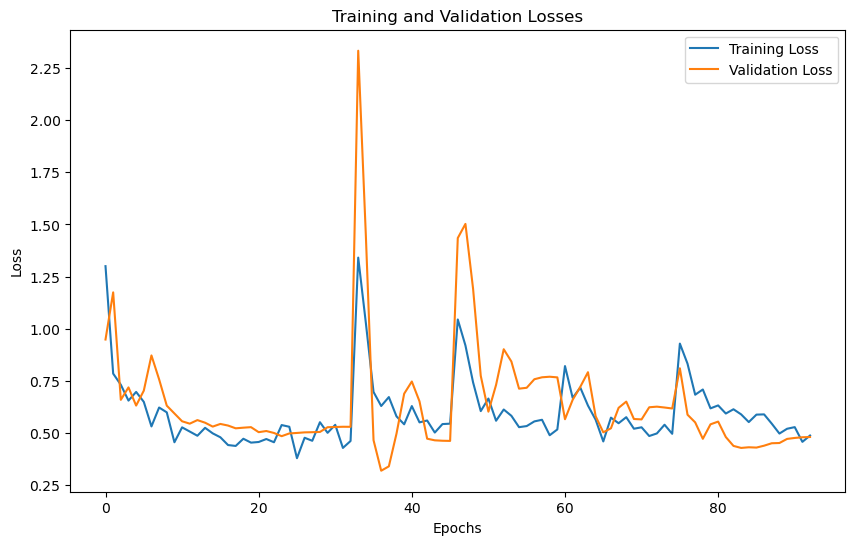

C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


'transformer_model_architecture.png'

In [ ]:
import torch.nn.functional as F
from torchviz import make_dot

# Define the Transformer Model without Positional Encoding
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads=8, num_layers=4, dim_feedforward=512, dropout_rate=0.3):
        super(TransformerModel, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.dim_feedforward = dim_feedforward
        self.dropout_rate = dropout_rate

        # Embedding layer
        self.embedding = nn.Linear(input_dim, dim_feedforward)

        # Transformer Encoder
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=dim_feedforward,
                nhead=num_heads,
                dim_feedforward=dim_feedforward,
                dropout=dropout_rate
            ),
            num_layers=num_layers
        )

        # Output layer
        self.output_layer = nn.Linear(dim_feedforward, output_dim)

    def forward(self, x):
        # x shape should be (batch_size, feature_size)
        x = self.embedding(x)

        # Since we don't have sequential data, we just add an extra dimension for the sequence length (1)
        x = x.unsqueeze(1)  # Shape becomes (batch_size, 1, feature_size)

        # Transpose x for transformer input (sequence_length, batch_size, feature_size)
        x = x.transpose(0, 1)

        # Pass through transformer encoder
        x = self.transformer_encoder(x)

        # Get the output (taking the last token or the mean of outputs)
        x = x.mean(dim=0)  # Use mean pooling across the sequence
        x = self.output_layer(x)
        return x

# Ensemble class for weighted averaging
class Ensemble:
    def __init__(self):
        self.models = []
        self.weights = []

    def add_model(self, model, weight):
        self.models.append(model)
        self.weights.append(weight)

    def predict(self, X):
        predictions = [weight * model(X) for model, weight in zip(self.models, self.weights)]
        return torch.stack(predictions).sum(dim=0) / sum(self.weights)

# Load and preprocess data
# Example: data = pd.read_csv("your_data.csv")
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Fill missing values
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Polynomial features
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X = poly.fit_transform(data[['HoehnYahr', 'Speed_10', 'TUAG']])
y = data[['UPDRS']].values

# Scale features and targets
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Split into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Convert to PyTorch tensors
X_train_tensor, y_train_tensor = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_val_tensor, y_val_tensor = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32)
X_test_tensor, y_test_tensor = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# DataLoader for batching
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Cross-validation setup
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
ensemble = Ensemble()

# Store training and validation losses for visualization
train_losses = []
val_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_temp)):
    print(f"Training Fold {fold + 1}/{k_folds}")

    # Split into train and validation subsets
    X_train_fold, X_val_fold = X_temp[train_idx], X_temp[val_idx]
    y_train_fold, y_val_fold = y_temp[train_idx], y_temp[val_idx]

    # Convert to tensors
    X_train_tensor_fold, y_train_tensor_fold = torch.tensor(X_train_fold, dtype=torch.float32), torch.tensor(y_train_fold, dtype=torch.float32)
    X_val_tensor_fold, y_val_tensor_fold = torch.tensor(X_val_fold, dtype=torch.float32), torch.tensor(y_val_fold, dtype=torch.float32)

    # Initialize model
    input_dim = X_train_fold.shape[1]
    output_dim = y_train_fold.shape[1]
    model = TransformerModel(input_dim, output_dim, num_heads=8, num_layers=4, dim_feedforward=512, dropout_rate=0.3).train()

    # Optimizer and loss function
    optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
    criterion = nn.MSELoss()

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.1, verbose=True)

    # Early stopping
    patience = 10
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    num_epochs = 100

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for X_batch, y_batch in DataLoader(TensorDataset(X_train_tensor_fold, y_train_tensor_fold), batch_size=batch_size, shuffle=True):
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor_fold)
            val_loss = criterion(val_outputs, y_val_tensor_fold).item()

        # Learning rate scheduling
        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
            torch.save(model.state_dict(), f"best_model_fold_{fold + 1}.pth")
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

        # Store losses for visualization
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss)

        # Print loss for each epoch
        print(f"Epoch {epoch + 1}/{num_epochs} | Train Loss: {train_loss / len(train_loader):.4f} | Validation Loss: {val_loss:.4f}")

    # Add best model to ensemble
    model.load_state_dict(torch.load(f"best_model_fold_{fold + 1}.pth"))
    ensemble.add_model(model.eval(), 1 / best_val_loss)

# Ensemble evaluation
ensemble_predictions = ensemble.predict(X_test_tensor).detach().numpy()
test_mae = mean_absolute_error(y_test, ensemble_predictions)
test_r2 = r2_score(y_test, ensemble_predictions)
test_explained_variance = explained_variance_score(y_test, ensemble_predictions)

print(f"Ensemble Test MAE: {test_mae:.4f}")
print(f"Ensemble Test R²: {test_r2:.4f}")
print(f"Ensemble Test Explained Variance: {test_explained_variance:.4f}")

# Plot training and validation loss curves
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Visualize the model architecture using torchviz
dummy_input = torch.randn(1, X_train_tensor.shape[1])  # A dummy input tensor of shape (1, feature_size)
model = TransformerModel(input_dim=X_train_tensor.shape[1], output_dim=1)  # Initialize model
out = model(dummy_input)  # Forward pass to trace the model
make_dot(out, params=dict(model.named_parameters())).render("transformer_model_architecture", format="png")

Epoch [1/100], Train R²: 0.0253, Val R²: 0.0875
Epoch [2/100], Train R²: 0.1104, Val R²: 0.1539
Epoch [3/100], Train R²: 0.1599, Val R²: 0.2103
Epoch [4/100], Train R²: 0.2366, Val R²: 0.2368
Epoch [5/100], Train R²: 0.3028, Val R²: 0.2441
Epoch [6/100], Train R²: 0.3334, Val R²: 0.2736
Epoch [7/100], Train R²: 0.3250, Val R²: 0.2618
Epoch [8/100], Train R²: 0.3586, Val R²: 0.2158
Epoch [9/100], Train R²: 0.3616, Val R²: 0.1936
Epoch [10/100], Train R²: 0.3853, Val R²: 0.2054
Epoch [11/100], Train R²: 0.3683, Val R²: 0.2587
Epoch [12/100], Train R²: 0.3754, Val R²: 0.2845
Epoch [13/100], Train R²: 0.3770, Val R²: 0.3064
Epoch [14/100], Train R²: 0.3863, Val R²: 0.3150
Epoch [15/100], Train R²: 0.3846, Val R²: 0.3268
Epoch [16/100], Train R²: 0.4000, Val R²: 0.3257
Epoch [17/100], Train R²: 0.4127, Val R²: 0.3153
Epoch [18/100], Train R²: 0.4097, Val R²: 0.3136
Epoch [19/100], Train R²: 0.3871, Val R²: 0.3150
Epoch [20/100], Train R²: 0.4551, Val R²: 0.3173
Epoch [21/100], Train R²: 0.4

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Ensemble Test R²: 0.5444
Ensemble Test MAE: 0.5898
Ensemble Test Explained Variance: 0.5460


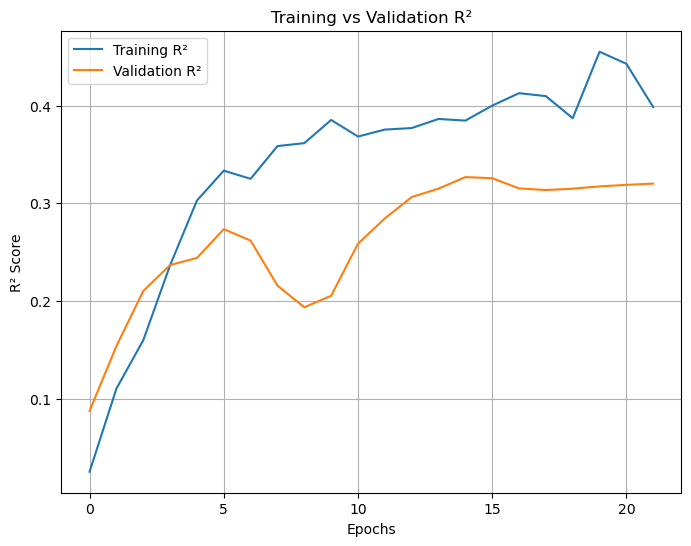

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = data[['HoehnYahr', 'Speed_10', 'TUAG']]
y = data[['UPDRS']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model
class CNN1D(nn.Module):
    def __init__(self, input_channels, output_dim, input_dim):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 64, kernel_size=2, stride=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=2, stride=1)

        # Compute the flattened size dynamically
        self._to_linear = None
        self._calculate_flattened_size(input_dim)

        self.fc1 = nn.Linear(self._to_linear, 64)
        self.fc2 = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(0.4)

    def _calculate_flattened_size(self, input_dim):
        with torch.no_grad():
            x = torch.zeros(1, 1, input_dim)  # Example input tensor
            x = torch.relu(self.conv1(x))
            x = torch.relu(self.conv2(x))
            self._to_linear = x.view(1, -1).size(1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize the CNN model
input_channels = 1  # 1 channel for tabular data
output_dim = y_train.shape[1]
input_dim = X_train.shape[1]  # Number of features

cnn_model = CNN1D(input_channels, output_dim, input_dim)

# Define loss function, optimizer, and scheduler
criterion = nn.MSELoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5)

# Training loop with validation
num_epochs = 100
patience = 10
best_val_loss = float('inf')
epochs_without_improvement = 0
train_r2_scores, val_r2_scores = [], []

for epoch in range(num_epochs):
    # Training
    cnn_model.train()
    y_train_pred = []
    y_train_true = []
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        y_train_pred.extend(outputs.detach().numpy())
        y_train_true.extend(y_batch.numpy())

    train_r2 = r2_score(y_train_true, y_train_pred)
    train_r2_scores.append(train_r2)

    # Validation
    cnn_model.eval()
    y_val_pred = []
    y_val_true = []
    val_loss_epoch = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = cnn_model(X_batch)
            val_loss_epoch += criterion(outputs, y_batch).item()
            y_val_pred.extend(outputs.numpy())
            y_val_true.extend(y_batch.numpy())

    val_r2 = r2_score(y_val_true, y_val_pred)
    val_r2_scores.append(val_r2)
    val_loss_epoch /= len(val_loader)
    scheduler.step(val_loss_epoch)

    # Early stopping
    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        epochs_without_improvement = 0
        torch.save(cnn_model.state_dict(), "best_cnn_model.pth")
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print(f"Early stopping triggered at epoch {epoch + 1}")
        break

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

# Load the best CNN model
cnn_model.load_state_dict(torch.load("best_cnn_model.pth"))

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Ensemble: Combine CNN and Random Forest models
class Ensemble:
    def __init__(self):
        self.models = []

    def add_model(self, model):
        self.models.append(model)

    def predict(self, X):
        predictions = np.zeros((len(X), len(self.models)))
        for i, model in enumerate(self.models):
            if isinstance(model, nn.Module):  # For CNN models
                model.eval()
                with torch.no_grad():
                    predictions[:, i] = model(torch.tensor(X, dtype=torch.float32).unsqueeze(1)).numpy().flatten()
            else:  # For non-CNN models (like RandomForest)
                predictions[:, i] = model.predict(X)
        return np.mean(predictions, axis=1)

# Create ensemble model and add CNN and Random Forest models
ensemble = Ensemble()
ensemble.add_model(cnn_model)
ensemble.add_model(rf_model)

# Evaluate ensemble model on the test set
ensemble_predictions = ensemble.predict(X_test)
ensemble_r2 = r2_score(y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_explained_variance = explained_variance_score(y_test, ensemble_predictions)

print(f"Ensemble Test R²: {ensemble_r2:.4f}")
print(f"Ensemble Test MAE: {ensemble_mae:.4f}")
print(f"Ensemble Test Explained Variance: {ensemble_explained_variance:.4f}")

# Plot training vs validation R²
plt.figure(figsize=(8, 6))
plt.plot(train_r2_scores, label='Training R²')
plt.plot(val_r2_scores, label='Validation R²')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Training vs Validation R²')
plt.legend()
plt.grid(True)
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 2
[LightGBM] [Info] Start training from score -0.029730
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

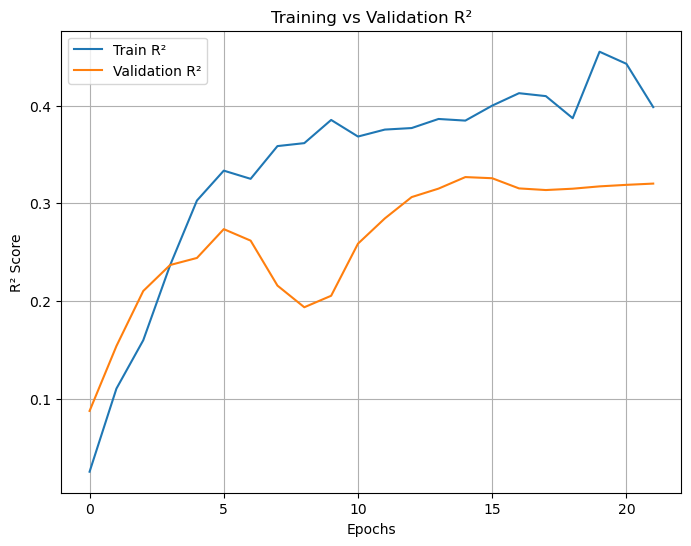

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import xgboost as xgb
import lightgbm as lgb

X = data[['HoehnYahr', 'Speed_10', 'TUAG']]
y = data[['UPDRS']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# CNN Model
class CNN1D(nn.Module):
    def __init__(self, input_channels, output_dim, input_dim):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 64, kernel_size=2, stride=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=2, stride=1)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(0.5)  # Increased dropout to regularize the model
        self._to_linear = 128

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Hyperparameter tuning for CNN using GridSearch
def tune_cnn_hyperparameters():
    param_grid = {
        'batch_size': [32, 64],
        'lr': [1e-3, 1e-4],
        'dropout': [0.4, 0.5]
    }
    # Implement grid search for CNN - need to implement manually as PyTorch doesn't directly support GridSearchCV
    best_model = None
    best_r2 = float('-inf')

    for batch_size in param_grid['batch_size']:
        for lr in param_grid['lr']:
            for dropout in param_grid['dropout']:
                model = CNN1D(input_channels=1, output_dim=1, input_dim=X_train.shape[1])
                optimizer = optim.Adam(model.parameters(), lr=lr)
                scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5)
                criterion = nn.MSELoss()

                # Training loop for the current set of parameters
                model.train()
                for epoch in range(10):  # Limit epochs for quick tuning
                    for X_batch, y_batch in train_loader:
                        optimizer.zero_grad()
                        outputs = model(X_batch)
                        loss = criterion(outputs, y_batch)
                        loss.backward()
                        optimizer.step()

                # Evaluate on validation data
                model.eval()
                with torch.no_grad():
                    y_val_pred = model(X_val_tensor)
                    val_r2 = r2_score(y_val, y_val_pred.numpy())

                if val_r2 > best_r2:
                    best_r2 = val_r2
                    best_model = model

    return best_model

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# XGBoost Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, random_state=42)
xg_model.fit(X_train, y_train.ravel())

# LightGBM Model
lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, max_depth=5, random_state=42)
lgb_model.fit(X_train, y_train.ravel())

# Ensemble model using the trained CNN, Random Forest, XGBoost, and LightGBM models
ensemble_predictions = []
for model in [rf_model, xg_model, lgb_model]:
    ensemble_predictions.append(model.predict(X_test))

ensemble_predictions = np.mean(ensemble_predictions, axis=0)

# Evaluation
ensemble_r2 = r2_score(y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_explained_variance = explained_variance_score(y_test, ensemble_predictions)

print(f"Ensemble Test R²: {ensemble_r2:.4f}")
print(f"Ensemble Test MAE: {ensemble_mae:.4f}")
print(f"Ensemble Test Explained Variance: {ensemble_explained_variance:.4f}")

# Plotting Training vs Validation R²
plt.figure(figsize=(8, 6))
plt.plot(train_r2_scores, label='Train R²')
plt.plot(val_r2_scores, label='Validation R²')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Training vs Validation R²')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

X = data[['HoehnYahr', 'Speed_10', 'TUAG']]
y = data[['UPDRS']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Convert to tensors for CNN
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# CNN Model Definition
class CNN1D(nn.Module):
    def __init__(self, input_channels, output_dim, input_dim):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 64, kernel_size=2, stride=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=2, stride=1)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Wrapper for CNN to integrate with scikit-learn
class CNNRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_channels=1, output_dim=1, input_dim=3, lr=1e-3, batch_size=32, dropout=0.5, epochs=100):
        self.input_channels = input_channels
        self.output_dim = output_dim
        self.input_dim = input_dim
        self.lr = lr
        self.batch_size = batch_size
        self.dropout = dropout
        self.epochs = epochs
        self.model = CNN1D(input_channels=input_channels, output_dim=output_dim, input_dim=input_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.criterion = nn.MSELoss()

    def fit(self, X, y):
        # Convert to tensor
        X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
        y_tensor = torch.tensor(y, dtype=torch.float32)

        # Training loop
        self.model.train()
        for epoch in range(self.epochs):
            for i in range(0, len(X), self.batch_size):
                X_batch = X_tensor[i:i+self.batch_size]
                y_batch = y_tensor[i:i+self.batch_size]

                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                self.optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
        with torch.no_grad():
            predictions = self.model(X_tensor)
        return predictions.numpy()

# Train base models (Random Forest, XGBoost, LightGBM)

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# 3. XGBoost Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, random_state=42)
xg_model.fit(X_train, y_train.ravel())

# 4. LightGBM Model
lgb_model = lgb.LGBMRegressor(objective='regression',
                              n_estimators=100,
                              max_depth=5,
                              random_state=42,
                              verbose=-1)  # Suppressing warnings
lgb_model.fit(X_train, y_train.ravel())

# 5. Stacking Model
# Create a meta-model using stacking regressor
base_learners = [
    ('cnn', CNNRegressor(input_dim=X_train.shape[1])),  # CNN model
    ('rf', rf_model),
    ('xgboost', xg_model),
    ('lightgbm', lgb_model)
]

meta_model = LinearRegression()

stacked_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)
stacked_model.fit(X_train, y_train.ravel())

# Evaluate the stacked model
stacked_predictions = stacked_model.predict(X_test)

# Performance Evaluation
stacked_r2 = r2_score(y_test, stacked_predictions)
stacked_mae = mean_absolute_error(y_test, stacked_predictions)
stacked_explained_variance = explained_variance_score(y_test, stacked_predictions)

print(f"Stacked Model Test R²: {stacked_r2:.4f}")
print(f"Stacked Model Test MAE: {stacked_mae:.4f}")
print(f"Stacked Model Test Explained Variance: {stacked_explained_variance:.4f}")

# Plotting Training vs Validation R² (from CNN training loop, keep track of the R² scores)
train_r2_scores = []  # Should be updated inside the training loop
val_r2_scores = []    # Should be updated inside the training loop

C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(in

Stacked Model Test R²: 0.5755
Stacked Model Test MAE: 0.6376
Stacked Model Test Explained Variance: 0.5791
